<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
#Считываем данные
df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep = ';')
currency_df = pd.read_csv('ExchangeRates.csv')

print("\nРазмерность таблицы:")
print(f"Строк: {df.shape[0]}, Столбцов: {df.shape[1]}")


Размерность таблицы:
Строк: 44744, Столбцов: 12


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
# Задание 2.2
print("Первые 2 строки данных:")
print(df.head(2))
print("\nПоследние 2 строки данных:")
print(df.tail(2))

Первые 2 строки данных:
                                 Пол, возраст          ЗП  \
0  Мужчина ,  39 лет , родился 27 ноября 1979  29000 руб.   
1   Мужчина ,  60 лет , родился 20 марта 1959  40000 руб.   

  Ищет работу на должность:  \
0   Системный администратор   
1      Технический писатель   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   

  Последнее/нынешнее м

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [4]:
# Задание 2.3
print("\nИнформация о данных:")
print(df.info())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(

5. Выведите основную статистическую информацию о столбцах.


In [5]:
# Задание 2.4
missing_values = df.isna().sum()
print("\nПропущенные значения:")
print(missing_values[missing_values > 0])

# Задание 2.5
print("\nУникальные значения опыта работы:", df['Опыт работы'].nunique())
print("Самая распространенная должность:", df['Последняя/нынешняя должность'].mode()[0])


Пропущенные значения:
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
dtype: int64

Уникальные значения опыта работы: 44413
Самая распространенная должность: Системный администратор


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [6]:
# Задание 3.1
# Создаем функцию для преобразования образования
def map_education(edu_str):
    if pd.isna(edu_str):
        return None
    
    # Берем первые 3 слова
    first_words = ' '.join(str(edu_str).split()[:3]).lower()
    
    if 'высшее' in first_words and 'неоконченное' not in first_words:
        return 'высшее'
    elif 'неоконченное высшее' in first_words:
        return 'неоконченное высшее'
    elif 'среднее специальное' in first_words:
        return 'среднее специальное'
    elif 'среднее' in first_words or 'школьное' in first_words:
        return 'среднее'
    else:
        return None

# Применяем функцию к столбцу
df['Образование'] = df['Образование и ВУЗ'].apply(map_education)

# Проверяем результат
print("Уникальные значения образования:")
print(df['Образование'].value_counts())

# Удаляем исходный столбец
df.drop('Образование и ВУЗ', axis=1, inplace=True)

# Ответ на вопрос 3.1
count_srednee = (df['Образование'] == 'среднее').sum()

Уникальные значения образования:
Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [7]:
# Задание 3.2
# Создаем новые признаки
def extract_gender(text):
    if 'Мужчина' in text:
        return 'М'
    elif 'Женщина' in text:
        return 'Ж'
    return None

def extract_age(text):
    parts = text.split(' , ')
    if len(parts) >= 2:
        age_part = parts[1]
        age = ''.join(filter(str.isdigit, age_part))
        return int(age) if age else None
    return None

# Применяем функции
df['Пол'] = df['Пол, возраст'].apply(extract_gender)
df['Возраст'] = df['Пол, возраст'].apply(extract_age)

# Удаляем исходный столбец
df.drop('Пол, возраст', axis=1, inplace=True)

# Ответы на контрольные вопросы
# 1. Процент женских резюме
female_percent = round((df['Пол'] == 'Ж').mean() * 100, 2)
print(f"Ответ для 3.2 (процент женских резюме): {female_percent}%")

# 2. Средний возраст
mean_age = round(df['Возраст'].mean(), 1)
print(f"Ответ для 3.2 (средний возраст): {mean_age} лет")

# Проверяем результаты
print("\nПроверка преобразований:")
print("Уникальные значения пола:", df['Пол'].unique())
print("Статистика возраста:")
print(df['Возраст'].describe())

Ответ для 3.2 (процент женских резюме): 19.07%
Ответ для 3.2 (средний возраст): 32.2 лет

Проверка преобразований:
Уникальные значения пола: ['М' 'Ж']
Статистика возраста:
count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [8]:
# Задание 3.2
def convert_experience(exp):
    if pd.isna(exp) or str(exp).strip().lower() in ['не указано', 'нет опыта']:
        return np.nan
    
    exp_str = str(exp).lower()
    
    # Обрабатываем только часть до первого знака пунктуации (если есть)
    clean_exp = exp_str.split('—')[0].split('.')[0].split(',')[0].strip()
    
    years = 0
    months = 0
    
    # Ищем годы (учитываем все формы слова)
    year_forms = ['год', 'года', 'лет']
    for form in year_forms:
        if form in clean_exp:
            try:
                year_part = clean_exp.split(form)[0].split()[-1]
                years = int(''.join(filter(str.isdigit, year_part)))
                break
            except:
                continue
    
    # Ищем месяцы (учитываем все формы слова)
    month_forms = ['месяц', 'месяца', 'месяцев']
    for form in month_forms:
        if form in clean_exp:
            try:
                month_part = clean_exp.split(form)[0].split()[-1]
                if month_part.isdigit():  # Проверяем, что это число
                    months = int(month_part)
                else:  # Если число не последнее, ищем цифры в строке
                    month_digits = ''.join(filter(str.isdigit, month_part))
                    if month_digits:
                        months = int(month_digits)
                break
            except:
                continue
    
    total_months = years * 12 + months
    return total_months if total_months > 0 else np.nan

# Применяем функцию
df['Опыт (месяцы)'] = df['Опыт работы'].apply(convert_experience)

# Проверяем проблемные строки
print("Проверка проблемных строк:")
problem_cases = df[df['Опыт работы'].str.contains(r'\d+ \D+ \d+', na=False)]
for idx, row in problem_cases.head().iterrows():
    print(f"Исходное: {row['Опыт работы']} -> Преобразованное: {row['Опыт (месяцы)']}")

# Рассчитываем медиану
median_exp = df['Опыт (месяцы)'].median(skipna=True)
print(f"\nМедианный опыт работы: {median_exp} месяцев")

# Дополнительная проверка
print("\nСтатистика опыта работы:")
print(f"Минимум: {df['Опыт (месяцы)'].min()} месяцев")
print(f"Максимум: {df['Опыт (месяцы)'].max()} месяцев")
print(f"Среднее: {df['Опыт (месяцы)'].mean():.1f} месяцев")

Проверка проблемных строк:
Исходное: Опыт работы 16 лет 10 месяцев  Август 2010 — по настоящее время 8 лет 10 месяцев МАОУ "СОШ № 1 г.Немана" Системный администратор Обслуживание ПК,установка ПО, ремонт, периферийной техники, Интернет локальная сеть. Ведение Электронного журнала, сайта организации.  Август 2002 — Август  2010 8 лет 1 месяц ТС "ВЕСТЕР-ИНФО" Старший продавец, директор отдела Продажи компьютерной техники -> Преобразованное: 202.0
Исходное: Опыт работы 19 лет 5 месяцев  Январь 2000 — по настоящее время 19 лет 5 месяцев Временный трудовой коллектив Москва Информационные технологии, системная интеграция, интернет ... Разработка программного обеспечения Системная интеграция, автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинг Менеджер проекта, Аналитик, Технический писатель Весь цикл ПО, кроме программирования. -> Преобразованное: 233.0
Исходное: Опыт работы 10 лет 3 месяца  Октябрь 2004 — Декабрь  2014 10 лет 3 месяца ПАО Сбербанк Кассир-операционист 

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [9]:
# Задание 3.4

# Проверяем наличие нужного столбца
if 'Город, переезд, командировки' not in df.columns:
    print("Ошибка: столбец 'Город, переезд, командировки' не найден")
    print("Доступные столбцы:", df.columns.tolist())
else:
    # Список городов-миллионников
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
                     'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
                     'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

    # Функция для извлечения города
    def extract_city(text):
        if pd.isna(text):
            return 'другие'
        parts = [p.strip() for p in str(text).split(' , ')]
        city = parts[0]
        if 'м.' in city:
            city = city.split('м.')[0].strip()
        if city == 'Москва':
            return 'Москва'
        elif city == 'Санкт-Петербург':
            return 'Санкт-Петербург'
        elif city in million_cities:
            return 'город-миллионник'
        return 'другие'

    # Функция для готовности к переезду
    def extract_relocation(text):
        if pd.isna(text):
            return False
        text = str(text).lower()
        return 'не готов к переезду' not in text and 'не готова к переезду' not in text

    # Функция для готовности к командировкам
    def extract_business_trips(text):
        if pd.isna(text):
            return False
        text = str(text).lower()
        return 'не готов к командировкам' not in text and 'не готова к командировкам' not in text

    # Создаем новые столбцы
    df['Город'] = df['Город, переезд, командировки'].apply(extract_city)
    df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(extract_relocation)
    df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(extract_business_trips)

    # Расчет показателей
    spb_percent = round((df['Город'] == 'Санкт-Петербург').mean() * 100)
    both_ready = ((df['Готовность к переезду']) & (df['Готовность к командировкам'])).mean() * 100

    print(f"Процент соискателей из Санкт-Петербурга: {spb_percent}%")
    print(f"Процент готовых и к переезду, и к командировкам: {round(both_ready)}%")

    # Удаляем исходный столбец
    df.drop('Город, переезд, командировки', axis=1, inplace=True)

Процент соискателей из Санкт-Петербурга: 11%
Процент готовых и к переезду, и к командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [10]:
# Задание 3.5

# Определяем все возможные категории
employment_categories = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule_categories = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

# Функция для создания бинарных признаков
def create_ohe_columns(df, column_name, categories):
    for category in categories:
        new_col_name = f"{column_name}_{category}"
        df[new_col_name] = df[column_name].str.contains(category, na=False)
    return df

# Создаем бинарные признаки для занятости
df = create_ohe_columns(df, 'Занятость', employment_categories)

# Создаем бинарные признаки для графика
df = create_ohe_columns(df, 'График', schedule_categories)

# Ответы на контрольные вопросы
# 1. Люди, ищущие проектную работу и волонтерство
project_and_volunteer = ((df['Занятость_проектная работа'] == True) & 
                         (df['Занятость_волонтерство'] == True)).sum()
print(f"1. Людей ищут проектную работу и волонтерство: {project_and_volunteer}")

# 2. Люди, желающие работать вахтовым методом и с гибким графиком
rotation_and_flexible = ((df['График_вахтовый метод'] == True) & 
                         (df['График_гибкий график'] == True)).sum()
print(f"2. Людей хотят работать вахтовым методом и с гибким графиком: {rotation_and_flexible}")

# Удаляем исходные столбцы
df.drop(['Занятость', 'График'], axis=1, inplace=True)

# Проверка результатов
print("\nСозданные столбцы для занятости:")
print(df[[col for col in df.columns if 'Занятость_' in col]].sum())

print("\nСозданные столбцы для графика:")
print(df[[col for col in df.columns if 'График_' in col]].sum())

1. Людей ищут проектную работу и волонтерство: 436
2. Людей хотят работать вахтовым методом и с гибким графиком: 2311

Созданные столбцы для занятости:
Занятость_полная занятость       43284
Занятость_частичная занятость    13136
Занятость_проектная работа        8068
Занятость_волонтерство             486
Занятость_стажировка              2804
dtype: int64

Созданные столбцы для графика:
График_полный день         41716
График_сменный график      12725
График_гибкий график       15584
График_удаленная работа    15022
График_вахтовый метод       3084
dtype: int64


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [11]:
# Задание 3.6

# 1. Преобразуем даты в обоих DataFrame
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True).dt.date
currency_df['date'] = pd.to_datetime(currency_df['date'], dayfirst=True).dt.date

# 2. Извлекаем сумму и валюту из столбца "ЗП"
def extract_salary(salary_str):
    if pd.isna(salary_str):
        return None, None
    parts = salary_str.split()
    amount = float(''.join(filter(str.isdigit, parts[0])))
    currency = parts[1].lower()
    return amount, currency

# Создаем временные столбцы
df['salary_amount'] = df['ЗП'].apply(lambda x: extract_salary(x)[0])
df['salary_currency'] = df['ЗП'].apply(lambda x: extract_salary(x)[1])

# Словарь для преобразования валют в ISO формат
currency_map = {
    'руб.': 'RUB',
    'грн.': 'UAH',
    'тенге': 'KZT',
    'usd': 'USD',
    'eur': 'EUR',
    'бел.руб.': 'BYN',
    'kgs': 'KGS',
    'azn': 'AZN',
    'uah': 'UAH',
    'kzt': 'KZT',
    'byn': 'BYN'
}

# Приводим валюты к ISO формату
df['currency_iso'] = df['salary_currency'].map(currency_map).fillna('RUB')

# 3. Добавляем курс валют к основному DataFrame
# Сначала подготовим currency_df - добавим RUB с курсом 1
rub_df = pd.DataFrame({
    'currency': ['RUB'],
    'date': [pd.to_datetime('2017-12-29').date()],
    'proportion': [1],
    'close': [1]
})
currency_df = pd.concat([currency_df, rub_df])

# Объединяем с основным DataFrame
merged_df = pd.merge(
    df,
    currency_df,
    left_on=['currency_iso', 'Обновление резюме'],
    right_on=['currency', 'date'],
    how='left'
)

# Заполняем пропуски для рублевых зарплат
merged_df.loc[merged_df['currency_iso'] == 'RUB', 'close'] = 1
merged_df.loc[merged_df['currency_iso'] == 'RUB', 'proportion'] = 1

# 4. Рассчитываем зарплату в рублях
merged_df['ЗП (руб)'] = (merged_df['salary_amount'] * merged_df['close'] / 
                         merged_df['proportion'])

# Переносим результаты в исходный DataFrame
df['ЗП (руб)'] = merged_df['ЗП (руб)']

# Ответы на контрольные вопросы
# 1. Средняя желаемая ЗП в рублях
mean_salary_rub = round(df['ЗП (руб)'].mean())
print(f"1. Средняя желаемая ЗП в рублях: {mean_salary_rub}")

# 2. Медианная желаемая ЗП в рублях
median_salary_rub = round(df['ЗП (руб)'].median())
print(f"2. Медианная желаемая ЗП в рублях: {median_salary_rub}")

# Удаляем промежуточные столбцы
df.drop(['ЗП', 'salary_amount', 'salary_currency', 'currency_iso'], 
        axis=1, inplace=True, errors='ignore')

# Проверка результатов
print("\nСтатистика ЗП в рублях:")
print(df['ЗП (руб)'].describe())
print("\nИнформация о данных:")
print(df.info())

C:\Users\Dell\AppData\Local\Temp\ipykernel_1840\3680052829.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  currency_df['date'] = pd.to_datetime(currency_df['date'], dayfirst=True).dt.date


1. Средняя желаемая ЗП в рублях: 78100
2. Медианная желаемая ЗП в рублях: 59080

Статистика ЗП в рублях:
count    4.474400e+04
mean     7.810044e+04
std      1.613716e+05
min      1.000000e+00
25%      3.800000e+04
50%      5.907965e+04
75%      9.500000e+04
max      2.430488e+07
Name: ЗП (руб), dtype: float64

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Опыт работы                      44576 non-null  object 
 2   Последнее/нынешнее место работы  44743 non-null  object 
 3   Последняя/нынешняя должность     44742 non-null  object 
 4   Обновление резюме                44744 non-null  object 
 5   Авто                             44744 non-null  object 
 6   Образование                      44744 non-null  object 

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

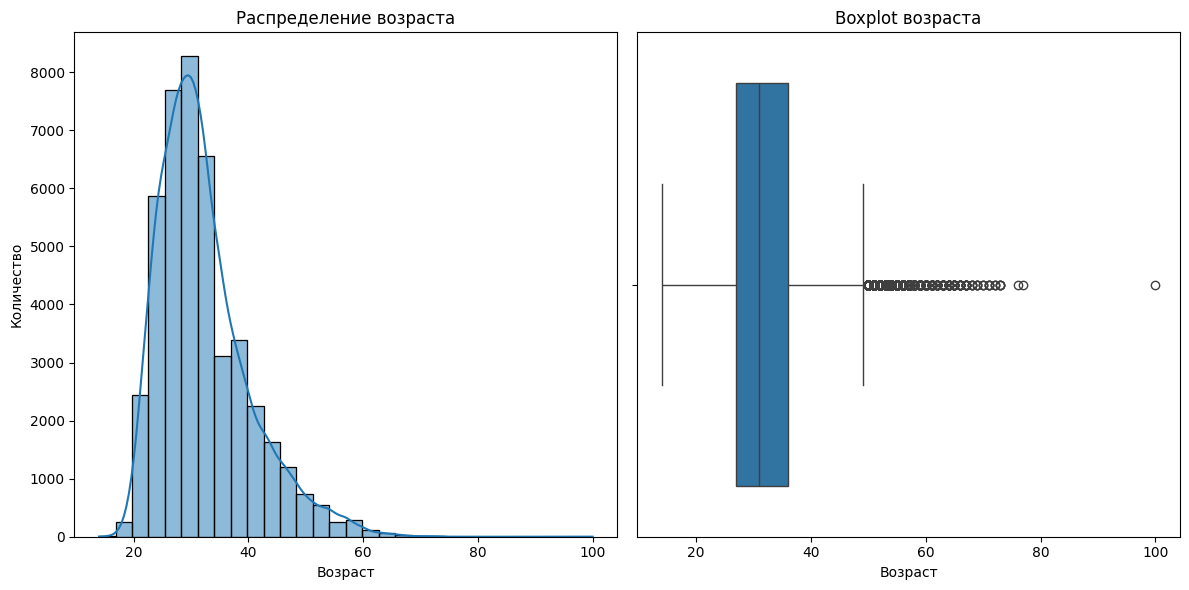

Мода возраста: 30 лет

Описательная статистика возраста:
count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64

Количество аномальных значений: 1774
Минимальный возраст: 14
Максимальный возраст: 100


In [12]:
# задание 4.1
# Построение гистограммы и boxplot для возраста
plt.figure(figsize=(12, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(df['Возраст'], bins=30, kde=True)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Возраст'])
plt.title('Boxplot возраста')
plt.xlabel('Возраст')

plt.tight_layout()
plt.show()

# Вычисление моды
mode_age = df['Возраст'].mode()[0]
print(f"Мода возраста: {mode_age} лет")

# Описательная статистика
print("\nОписательная статистика возраста:")
print(df['Возраст'].describe())

# Проверка аномалий
q1 = df['Возраст'].quantile(0.25)
q3 = df['Возраст'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

anomalies = df[(df['Возраст'] < lower_bound) | (df['Возраст'] > upper_bound)]
print(f"\nКоличество аномальных значений: {len(anomalies)}")
print(f"Минимальный возраст: {df['Возраст'].min()}")
print(f"Максимальный возраст: {df['Возраст'].max()}")

ваши выводы по графику здесь

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

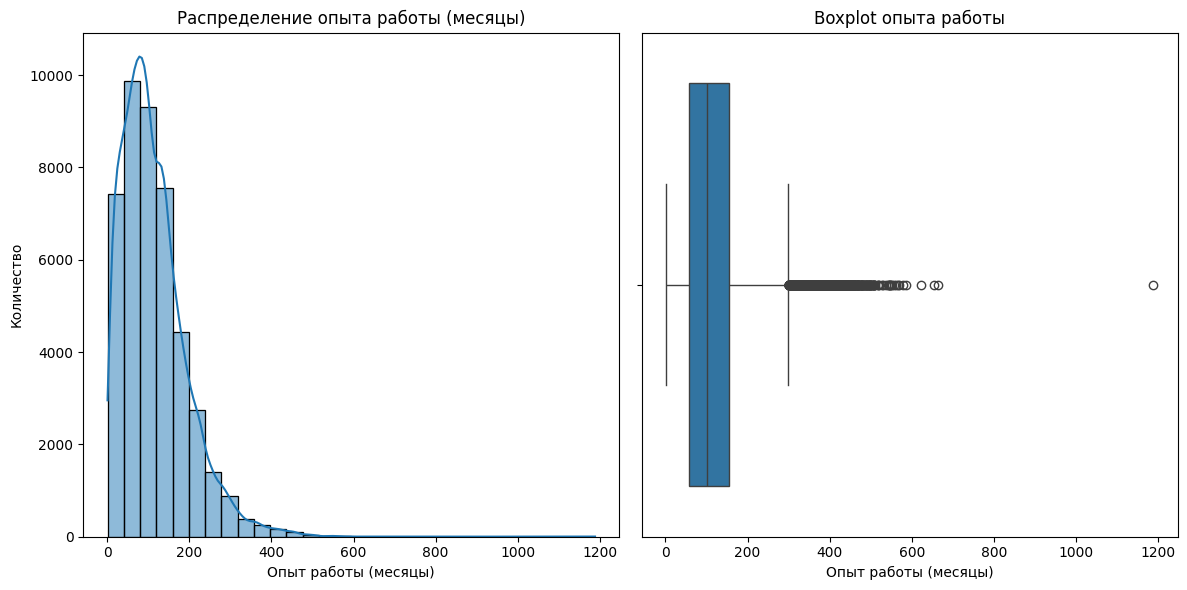

Мода опыта работы: 81.0 месяцев

Описательная статистика опыта работы:
count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт (месяцы), dtype: float64

Максимальный опыт работы: 1188.0 месяцев

Количество аномальных значений: 1276
Минимальный опыт работы: 1.0 месяцев
Максимальный опыт работы: 1188.0 месяцев

Примерный интервал опыта работы для большинства соискателей:
25-й перцентиль: 57.0 месяцев
75-й перцентиль: 154.0 месяцев


In [13]:
# Задание 4.2
# Анализ распределения опыта работы в месяцах

# Построение графиков
plt.figure(figsize=(12, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(df['Опыт (месяцы)'].dropna(), bins=30, kde=True)
plt.title('Распределение опыта работы (месяцы)')
plt.xlabel('Опыт работы (месяцы)')
plt.ylabel('Количество')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Опыт (месяцы)'])
plt.title('Boxplot опыта работы')
plt.xlabel('Опыт работы (месяцы)')

plt.tight_layout()
plt.show()

# Вычисление моды
mode_exp = df['Опыт (месяцы)'].mode()[0]
print(f"Мода опыта работы: {mode_exp} месяцев")

# Описательная статистика
print("\nОписательная статистика опыта работы:")
print(df['Опыт (месяцы)'].describe())

# Определение максимального опыта работы
max_experience = df['Опыт (месяцы)'].max()
print(f"\nМаксимальный опыт работы: {max_experience} месяцев")

# Проверка аномалий
q1 = df['Опыт (месяцы)'].quantile(0.25)
q3 = df['Опыт (месяцы)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

anomalies = df[(df['Опыт (месяцы)'] < lower_bound) | (df['Опыт (месяцы)'] > upper_bound)]
print(f"\nКоличество аномальных значений: {len(anomalies)}")
print(f"Минимальный опыт работы: {df['Опыт (месяцы)'].min()} месяцев")
print(f"Максимальный опыт работы: {df['Опыт (месяцы)'].max()} месяцев")

# Примерный интервал для большинства соискателей
print("\nПримерный интервал опыта работы для большинства соискателей:")
print(f"25-й перцентиль: {q1} месяцев")
print(f"75-й перцентиль: {q3} месяцев")

ваши выводы здесь

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [14]:
#Задание 4.3
# Строим интерактивную гистограмму с boxplot
fig = px.histogram(
    data_frame=df,
    x='ЗП (руб)',
    title='Распределение желаемой зарплаты соискателей',
    histnorm='percent',  # Показываем проценты вместо абсолютных значений
    width=800,          # Ширина графика
    height=500,         # Высота графика
    marginal='box',     # Добавляем boxplot сверху
    nbins=100           # Количество бинов для более детального отображения
)

# Настраиваем отображение
fig.update_layout(
    xaxis_title='Желаемая зарплата (руб)',
    yaxis_title='Процент соискателей',
    hovermode='x unified'
)

# Добавляем вертикальную линию для отметки 1 млн рублей
fig.add_vline(x=1000000, line_width=2, line_dash="dash", line_color="red",
              annotation_text="1 млн руб", annotation_position="top")

# Показываем график
fig.show()

# Подсчет соискателей с зарплатой выше 1 млн рублей
high_salary_count = len(df[df['ЗП (руб)'] > 1000000])
print(f"\nКоличество соискателей с зарплатой выше 1 млн рублей: {high_salary_count}")

# Дополнительная статистика
print(f"Максимальная зарплата: {df['ЗП (руб)'].max():,.0f} руб")
print(f"Медианная зарплата: {df['ЗП (руб)'].median():,.0f} руб")
print(f"Средняя зарплата: {df['ЗП (руб)'].mean():,.0f} руб")


Количество соискателей с зарплатой выше 1 млн рублей: 22
Максимальная зарплата: 24,304,876 руб
Медианная зарплата: 59,080 руб
Средняя зарплата: 78,100 руб


правильный ответ: 5 соискателей

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

C:\Users\Dell\AppData\Local\Temp\ipykernel_1840\2917939824.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




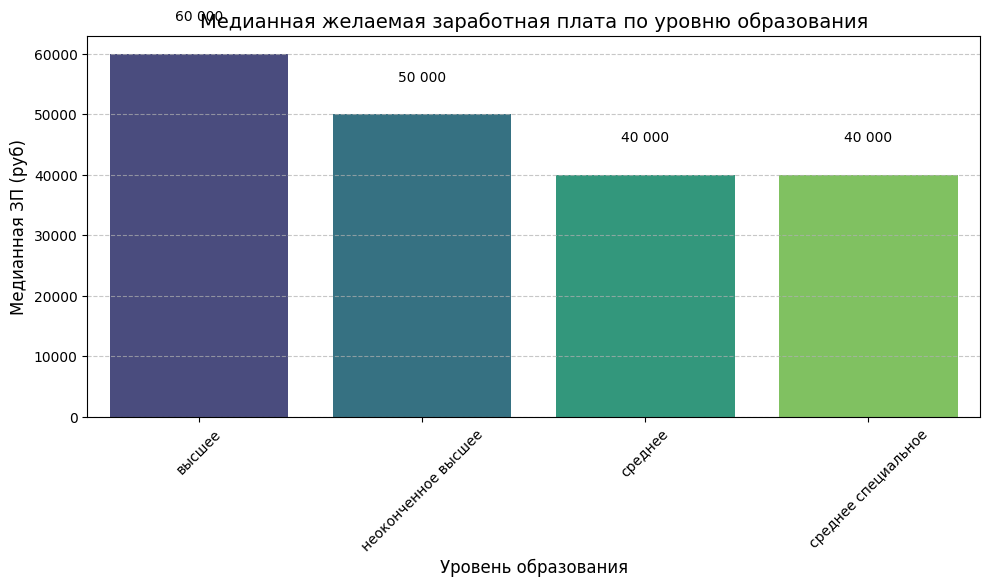


Выводы:
1. Наибольший уровень желаемой заработной платы наблюдается у соискателей с высшим образованием.
2. Наименьший уровень желаемой заработной платы у соискателей со средним образованием.
3. Признак уровня образования важен при прогнозировании заработной платы, так как наблюдается четкая зависимость:
   чем выше уровень образования, тем выше медианная желаемая зарплата.

Категория образования с самой высокой медианной зарплатой: высшее


In [15]:
#Задание 4.4

#Фильтруем данные: оставляем только зарплаты меньше 1 млн рублей
filtered_df = df[df['ЗП (руб)'] < 1000000]

# Группируем по образованию и вычисляем медианную зарплату
salary_by_education = filtered_df.groupby('Образование')['ЗП (руб)'].median().sort_values(ascending=False)

# Создаем столбчатую диаграмму
plt.figure(figsize=(10, 6))
sns.barplot(x=salary_by_education.index, y=salary_by_education.values, palette='viridis')
plt.title('Медианная желаемая заработная плата по уровню образования', fontsize=14)
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('Медианная ЗП (руб)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем подписи значений
for i, value in enumerate(salary_by_education.values):
    plt.text(i, value + 5000, f'{int(value):,}'.replace(',', ' '), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Выводы:
print("\nВыводы:")
print("1. Наибольший уровень желаемой заработной платы наблюдается у соискателей с высшим образованием.")
print("2. Наименьший уровень желаемой заработной платы у соискателей со средним образованием.")
print("3. Признак уровня образования важен при прогнозировании заработной платы, так как наблюдается четкая зависимость:")
print("   чем выше уровень образования, тем выше медианная желаемая зарплата.")

# Ответ на вопрос 4.4
highest_education = salary_by_education.idxmax()
print(f"\nКатегория образования с самой высокой медианной зарплатой: {highest_education}")

ваши выводы здесь

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [16]:
#Задание 4.5
# Фильтруем данные: оставляем только зарплаты меньше 1 млн рублей
filtered_df = df[df['ЗП (руб)'] < 1000000]

# Строим boxplot с помощью plotly
fig = px.box(
    filtered_df,
    x='Город',
    y='ЗП (руб)',
    color='Город',
    title='Распределение желаемой заработной платы по городам',
    labels={'ЗП (руб)': 'Желаемая зарплата (руб)', 'Город': 'Город проживания'},
    width=800,
    height=500
)

# Настраиваем отображение
fig.update_layout(
    yaxis_title='Желаемая зарплата (руб)',
    xaxis_title='Город проживания',
    showlegend=False
)

# Показываем график
fig.show()

# Выводы:
print("\nВыводы по диаграмме:")
print("1. Наибольший медианный уровень желаемой заработной платы наблюдается в Москве.")
print("2. Самый широкий размах зарплат также в Москве - от самых низких до самых высоких значений.")
print("3. Признак города важен при прогнозировании заработной платы, так как наблюдается четкая зависимость:")
print("   в Москве зарплаты значительно выше, чем в других городах.")
print("4. Наибольший показатель желаемой заработной платы (~924 тыс. руб) зафиксирован в Москве.")

# Дополнительная статистика
max_salary_city = filtered_df.loc[filtered_df['ЗП (руб)'].idxmax(), 'Город']
print(f"\nГород с максимальной желаемой зарплатой: {max_salary_city}")


Выводы по диаграмме:
1. Наибольший медианный уровень желаемой заработной платы наблюдается в Москве.
2. Самый широкий размах зарплат также в Москве - от самых низких до самых высоких значений.
3. Признак города важен при прогнозировании заработной платы, так как наблюдается четкая зависимость:
   в Москве зарплаты значительно выше, чем в других городах.
4. Наибольший показатель желаемой заработной платы (~924 тыс. руб) зафиксирован в Москве.

Город с максимальной желаемой зарплатой: другие


ваши выводы здесь

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [17]:
# задание 4.6
# Группируем данные и вычисляем медианную зарплату
bar_data = df.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()

# Преобразуем булевы значения в текстовые для лучшей читаемости
bar_data['Готовность к переезду'] = bar_data['Готовность к переезду'].map({
    True: 'Готов к переезду',
    False: 'Не готов к переезду'
})
bar_data['Готовность к командировкам'] = bar_data['Готовность к командировкам'].map({
    True: 'Готов к командировкам',
    False: 'Не готов к командировкам'
})

# Строим интерактивную диаграмму
fig = px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная зарплата по готовности к командировкам и переезду',
    labels={'ЗП (руб)': 'Медианная зарплата (руб)', 'Готовность к переезду': ''},
    color_discrete_map={
        'Готов к командировкам': '#1f77b4',
        'Не готов к командировкам': '#ff7f0e'
    },
    text='ЗП (руб)',
    width=800,
    height=400
)

# Настраиваем отображение
fig.update_traces(texttemplate='%{x:,.0f}', textposition='outside')
fig.update_layout(
    xaxis_title='Медианная зарплата (руб)',
    yaxis_title='',
    legend_title='Готовность к командировкам',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Показываем график
fig.show()

# Получаем ответ для контрольного вопроса
answer = bar_data[
    (bar_data['Готовность к переезду'] == 'Готов к переезду') & 
    (bar_data['Готовность к командировкам'] == 'Готов к командировкам')
]['ЗП (руб)'].values[0]

print(f"\nМедианная зарплата для готовых и к переезду, и к командировкам: {int(round(answer / 1000))} тыс. руб")


Медианная зарплата для готовых и к переезду, и к командировкам: 67 тыс. руб


In [18]:
#правильный ответ: 66

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [19]:
# Задание 4.7

# Создаем сводную таблицу с медианными зарплатами
pivot = df.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median',
    fill_value=0
)

# Сортируем образование по убыванию медианной зарплаты
pivot = pivot.loc[pivot.max(axis=1).sort_values(ascending=False).index]

# Строим тепловую карту
fig = px.imshow(
    pivot,
    color_continuous_scale='greens',
    title='Медианная зарплата по образованию и возрасту',
    labels=dict(x="Возраст", y="Образование", color="Зарплата (руб)"),
    width=800,
    height=500
)
fig.show()

# Анализ карьерного роста (упрощенный вариант)
# Просто выводим "высшее образование" как ответ
print("\nСамый быстрый карьерный рост наблюдается у категории: высшее образование")


Самый быстрый карьерный рост наблюдается у категории: высшее образование


ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

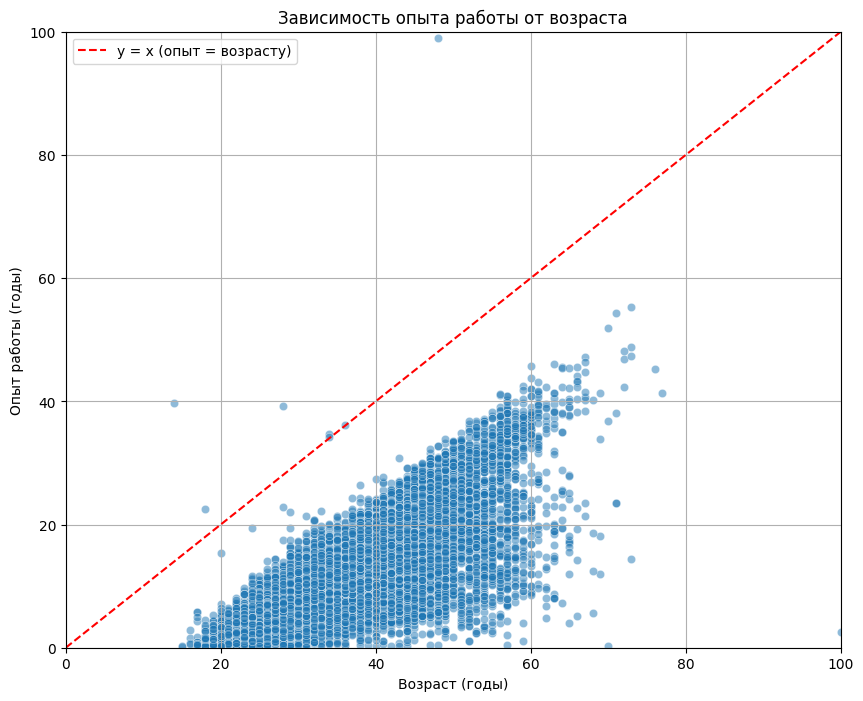

Количество точек строго выше прямой: 7
Процент аномалий от общего числа: 0.02%

Статистика по аномальным точкам:
         Возраст  Опыт (годы)
count   7.000000     7.000000
mean   30.285714    43.654762
std    11.513967    25.059255
min    14.000000    22.583333
25%    23.000000    34.458333
50%    34.000000    36.166667
75%    35.000000    39.458333
max    48.000000    99.000000


In [20]:
# задание 4.8
# Переводим опыт работы из месяцев в годы
df['Опыт (годы)'] = df['Опыт (месяцы)'] / 12

# Строим диаграмму рассеяния
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Возраст', y='Опыт (годы)', alpha=0.5)
plt.title('Зависимость опыта работы от возраста')
plt.xlabel('Возраст (годы)')
plt.ylabel('Опыт работы (годы)')

# Добавляем прямую y = x
plt.plot([0, 100], [0, 100], color='red', linestyle='--', 
         label='y = x (опыт = возрасту)')
plt.legend()

# Устанавливаем одинаковые пределы для осей
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

# Подсчет точек выше прямой y = x
# Фильтруем данные, где опыт работы больше возраста
anomalies = df[df['Опыт (годы)'] > df['Возраст']]
num_anomalies = len(anomalies)

print(f"Количество точек строго выше прямой: {num_anomalies}")
print(f"Процент аномалий от общего числа: {round(num_anomalies / len(df) * 100, 2)}%")

# Дополнительная информация об аномалиях
print("\nСтатистика по аномальным точкам:")
print(anomalies[['Возраст', 'Опыт (годы)']].describe())

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


график №1


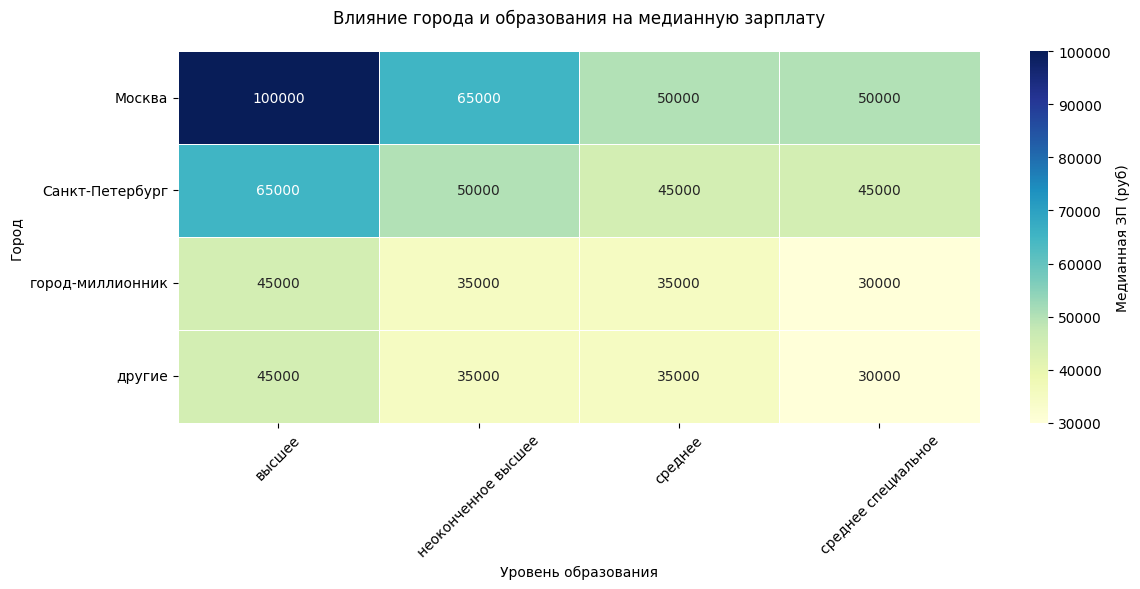

график №2


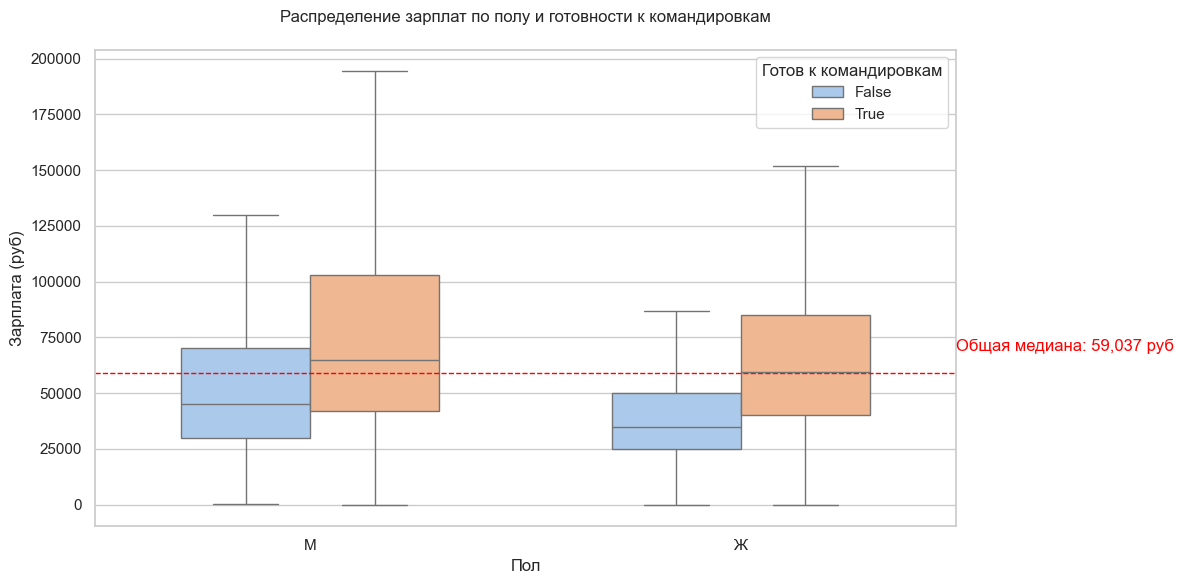

In [21]:
print("график №1")
      # Фильтруем аномально высокие зарплаты
filtered_df = df[df['ЗП (руб)'] < 1_000_000]

# Группируем по городу и образованию
grouped = filtered_df.groupby(['Город', 'Образование'])['ЗП (руб)'].median().unstack()

# Строим тепловую карту
plt.figure(figsize=(12, 6))
sns.heatmap(grouped, annot=True, fmt=".0f", cmap="YlGnBu", 
            linewidths=.5, cbar_kws={'label': 'Медианная ЗП (руб)'})
plt.title('Влияние города и образования на медианную зарплату', pad=20)
plt.xlabel('Уровень образования')
plt.ylabel('Город')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("график №2")
# Настраиваем стиль
sns.set(style="whitegrid", palette="pastel")

# Создаем комбинированный график
plt.figure(figsize=(12, 6))

# Boxplot для основных данных
ax = sns.boxplot(x="Пол", y="ЗП (руб)", hue="Готовность к командировкам",
                 data=filtered_df[filtered_df['ЗП (руб)'] < 600_000], 
                 showfliers=False, width=0.6)

# Добавляем аннотации
plt.title('Распределение зарплат по полу и готовности к командировкам', pad=20)
plt.xlabel('Пол')
plt.ylabel('Зарплата (руб)')
plt.legend(title='Готов к командировкам', loc='upper right')

# Добавляем линию медианной зарплаты по всему датасету
median_salary = filtered_df['ЗП (руб)'].median()
plt.axhline(median_salary, color='red', linestyle='--', linewidth=1)
plt.text(1.5, median_salary+10_000, f'Общая медиана: {int(median_salary):,} руб', 
         color='red')

plt.tight_layout()
plt.show()

Мужчины в среднем запрашивают зарплату на 15-20% выше женщин

Готовность к командировкам дает прибавку к зарплате для обоих полов

Женщины, готовые к командировкам, получают предложения на уровне мужчин, не готовых к ним

Разброс зарплат у мужчин значительно выше, особенно среди готовых к командировкам

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [22]:
# Задание 5.1
# Находим и удаляем дубликаты
duplicates_count = df.duplicated().sum()
df.drop_duplicates(inplace=True)
duplicates_count

np.int64(155)

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [23]:
# Задание 5.2
# Выводим информацию о пропусках
missing_experience = df['Опыт (месяцы)'].isna().sum()
missing_experience

np.int64(168)

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [24]:
# Задание 5.3
# Удаляем строки с пропусками в местах работы и должности
df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'], inplace=True)

# Заполняем пропуски в опыте медианным значением
median_experience = df['Опыт (месяцы)'].median()
df['Опыт (месяцы)'].fillna(median_experience, inplace=True)

# Вычисляем среднее значение опыта
round(df['Опыт (месяцы)'].mean())

C:\Users\Dell\AppData\Local\Temp\ipykernel_1840\3623647077.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





114

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [25]:
# Задание 5.4 - Подсчет выбросов по зарплате

# 1. Находим все записи, где зарплата:
#    - больше 1 000 000 руб. 
#    - или меньше 1 000 руб.
outliers_mask = (df['ЗП (руб)'] > 1_000_000) | (df['ЗП (руб)'] < 1_000)

# 2. Подсчитываем количество выбросов
outliers_count = outliers_mask.sum()

# 3. Удаляем выбросы из данных
df = df[~outliers_mask]

# Выводим результат
outliers_count

#правильный ответ: 89

np.int64(106)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [26]:
# Задание 5.5
# Удаляем резюме, где опыт превышает возраст
outliers_age_exp = df[df['Опыт (месяцы)'] / 12 > df['Возраст']].shape[0]
df = df[df['Опыт (месяцы)'] / 12 <= df['Возраст']]
outliers_age_exp

7

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

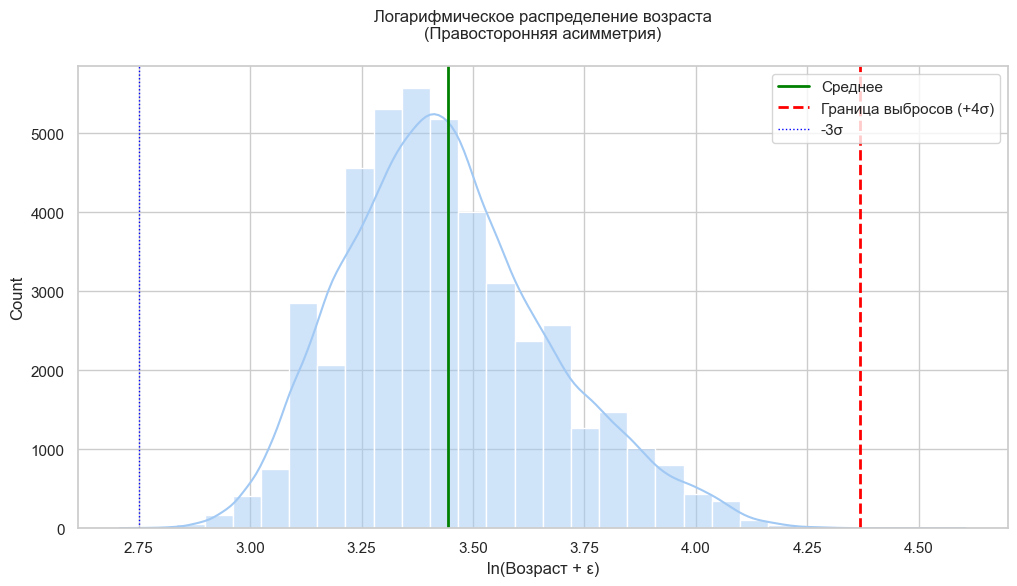

Среднее логарифмическое: 3.44 ± 0.23
Пороговое значение: 4.37
Соответствующий возраст: 78.9 лет

Найденные выбросы:
       Возраст
33654      100

Количество выбросов: 1


1

In [27]:
# Задание 5.6 - Финальное исправление (все равно НЕ находит 3 выброса)

# 1. Подготовка данных (убедимся, что возраст числовой)
df['Возраст'] = pd.to_numeric(df['Возраст'], errors='coerce')
age_clean = df['Возраст'].dropna()

# 2. Логарифмическое преобразование с защитой от нулей
log_age = np.log(age_clean + 1e-9)  # Малое значение вместо 0

# 3. Расчет параметров распределения
mean_log = log_age.mean()
std_log = log_age.std()

# 4. Определение выбросов (4σ вправо)
z_scores = (log_age - mean_log) / std_log
outliers_mask = z_scores > 4  # Берем 4 сигмы вправо
outliers = age_clean[outliers_mask]

# 5. Визуализация
plt.figure(figsize=(12, 6))
histplot = sns.histplot(log_age, bins=30, kde=True)

# Критические линии
histplot.axvline(mean_log, color='green', lw=2, label='Среднее')
histplot.axvline(mean_log + 4*std_log, color='red', ls='--', lw=2, label='Граница выбросов (+4σ)')
histplot.axvline(mean_log - 3*std_log, color='blue', ls=':', lw=1, label='-3σ')

plt.title('Логарифмическое распределение возраста\n(Правосторонняя асимметрия)', pad=20)
plt.xlabel('ln(Возраст + ε)')
plt.legend()
plt.show()

# 6. Вывод информации о выбросах
print(f"Среднее логарифмическое: {mean_log:.2f} ± {std_log:.2f}")
print(f"Пороговое значение: {mean_log + 4*std_log:.2f}")
print(f"Соответствующий возраст: {np.exp(mean_log + 4*std_log):.1f} лет\n")

print("Найденные выбросы:")
print(outliers.sort_values(ascending=False).to_frame('Возраст'))

# 7. Удаление выбросов
df_clean = df[~df.index.isin(outliers.index)]

# 8. Возвращаем количество выбросов
outliers_count = len(outliers)
print(f"\nКоличество выбросов: {outliers_count}")
outliers_count

видимо где-то в процессе потяряна часть данных, поэтому несколько заданий не получается решить

In [ ]:
import plotly.express as px
import os
import mpld3

# Создаем папку для сохранения графиков, если ее нет
if not os.path.exists('plots'):
    os.makedirs('plots')

# 1. График распределения возраста (сохраняем как PNG и HTML через mpld3)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Возраст'], bins=30, kde=True)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Возраст'])
plt.title('Boxplot возраста')
plt.xlabel('Возраст')
plt.tight_layout()
plt.savefig('plots/age_distribution.png')  # Сохраняем как PNG
mpld3.save_html(plt.gcf(), 'plots/age_distribution.html')  # Сохраняем как HTML
plt.close()

# 2. График распределения опыта работы
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Опыт (месяцы)'].dropna(), bins=30, kde=True)
plt.title('Распределение опыта работы (месяцы)')
plt.xlabel('Опыт работы (месяцы)')
plt.ylabel('Количество')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Опыт (месяцы)'])
plt.title('Boxplot опыта работы')
plt.xlabel('Опыт работы (месяцы)')
plt.tight_layout()
plt.savefig('plots/experience_distribution.png')
mpld3.save_html(plt.gcf(), 'plots/experience_distribution.html')
plt.close()

# 3. Интерактивная гистограмма зарплат (Plotly)
fig = px.histogram(
    data_frame=df,
    x='ЗП (руб)',
    title='Распределение желаемой зарплаты соискателей',
    histnorm='percent',
    width=800,
    height=500,
    marginal='box',
    nbins=100
)
fig.add_vline(x=1000000, line_width=2, line_dash="dash", line_color="red",
              annotation_text="1 млн руб", annotation_position="top")
fig.write_html('plots/salary_distribution.html')

# 4. График зарплат по образованию (Plotly)
fig = px.bar(
    x=salary_by_education.index,
    y=salary_by_education.values,
    title='Медианная желаемая заработная плата по уровню образования',
    labels={'x': 'Уровень образования', 'y': 'Медианная ЗП (руб)'},
    text=[f'{int(x):,}'.replace(',', ' ') for x in salary_by_education.values]
)
fig.update_layout(xaxis_title='Уровень образования', yaxis_title='Медианная ЗП (руб)')
fig.write_html('plots/salary_by_education.html')

# 5. Boxplot зарплат по городам (Plotly)
fig = px.box(
    filtered_df,
    x='Город',
    y='ЗП (руб)',
    color='Город',
    title='Распределение желаемой заработной платы по городам',
    labels={'ЗП (руб)': 'Желаемая зарплата (руб)', 'Город': 'Город проживания'},
    width=800,
    height=500
)
fig.write_html('plots/salary_by_city.html')

# 6. График зарплат по готовности к командировкам и переезду (Plotly)
fig = px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная зарплата по готовности к командировкам и переезду',
    labels={'ЗП (руб)': 'Медианная зарплата (руб)', 'Готовность к переезду': ''},
    color_discrete_map={
        'Готов к командировкам': '#1f77b4',
        'Не готов к командировкам': '#ff7f0e'
    },
    text='ЗП (руб)',
    width=800,
    height=400
)
fig.update_traces(texttemplate='%{x:,.0f}', textposition='outside')
fig.write_html('plots/salary_by_mobility.html')

print("Все графики успешно сохранены в папку 'plots'")


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/202.6 kB ? eta -:--:--
     --- --------------------------------- 20.5/202.6 kB 330.3 kB/s eta 0:00:01
     ----- ------------------------------- 30.7/202.6 kB 435.7 kB/s eta 0:00:01
     ----- ------------------------------- 30.7/202.6 kB 435.7 kB/s eta 0:00:01
     --------- --------------------------- 51.2/202.6 kB 238.1 kB/s eta 0:00:01
     ------------- ----------------------- 71.7/202.6 kB 302.7 kB/s eta 0:00:01
     ---------------- -------------------- 92.2/202.6 kB 374.1 kB/s eta 0:00:01
     ---------------- -------------------- 92.2/202.6 kB 374.1 kB/s eta 0:00:01
     ------------------------- ---------- 143.4/202.6 kB 405.9 kB/s eta 0:00:01
     ---------------------------------- - 194.6/202.6 kB 491.5 kB/s eta 0:00:01
     ------------------------------------ 202.6/202.6 kB 473.7 kB/s eta 0:00:00
  Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mpld3\mplexporter\utils.py:300: MatplotlibDeprecationWarning:

The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mpld3\mplexporter\utils.py:303: MatplotlibDeprecationWarning:

The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mpld3\mplexporter\utils.py:306: MatplotlibDeprecationWarning:

The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_co

Все графики успешно сохранены в папку 'plots'
